<a href="https://colab.research.google.com/github/sbj6364/voice-converter/blob/main/03_timing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3번 : 음성 데이터 분석하기 - timing

librosa 내에 포함된 `librosa.onset.onset_detect` 함수를 사용하여 주어진 음원 파일에서 발견된 onset을 표시한 그림을 저장하고, onset 단위로 음원을 잘라 저장하는 코드를 작성해보세요.

#### 베이스라인
~~~python
import soundfile as sf

audio, sr = librosa.load('speech.wav', sr=None)
onsets = ''' code here '''

plt.figure(figsize=(16,9))
plt.subplot(2,1,1)
plt.plot(audio)
plt.xlim([0,len(audio)])
for item in onsets:
    plt.axvline(x=(int)(item*sr), c='r')
    # 세로 선을 x 위치에 그려주는 함수. 

plt.title('waveform')
plt.subplot(2,1,2)
librosa.display.specshow(spectrogram)
for item in onsets:
    plt.axvline(x=(int)(item*sr/512), c='r')

plt.title('spectrogram')
plt.tight_layout()
plt.savefig('example3_output.png')
plt.close()

for i in range(len(onsets[:-1])):
    sf.write('example3_output_'+str(i).zfill(2)+'.wav', audio[(int)(onsets[i]*sr):(int)(onsets[i+1]*sr)], sr)
~~~

#### 설명
앞선 예제를 통해서 우리는 주어진 음성에서 각 시간에 따른 파형, spectrogram, rms, pitch 정보를 출력하는 방법을 익혔습니다. 따라서 음원과 특정 시점이 주어지면, 해당 시점에서 여러가지 정보들을 파악할 수 있게 되었습니다.

그렇다면 '시점' 자체에 대한 정보는 어떻게 파악할 수 있을까요? 예컨데 주어진 음원은 "그는 괜찮은척 하려고 애쓰는것 같았다." 라는 문자열을 발화하고 있는데, 이 중 그 나 괜 이 몇 초부터 시작되는지는 어떻게 파악할 수 있을까요?

사실 음성으로부터 그에 포함된 언어적 표현에 대한 정보를 추측해내는 것은 Speech-to-text, Automatic Speech Recognition, Speech-Text Alignment 등 다양한 이름과 분야로 연구되고있는 쉽지 않은 주제입니다. 그러나 우리는 가장 간단한 접근법 중 하나로, 주어진 시퀀스에서 어떤 새로운 event가 등장한 onset 시점을 판단해보는 실험을 해볼 수 있습니다.

onset은 'the beginning of a musical note or other sound' 으로 정의될 수 있으며, librosa 라이브러리에서는 waveform 으로부터 onset이 등장했을법한 시점을 계산해주는 `onset_detect` 함수를 제공하고 있습니다.

In [17]:
import IPython.display as ipd
ipd.Audio('speech.wav')

In [1]:
import numpy as np  
import librosa
import matplotlib 
matplotlib.use("Agg")
import matplotlib.pyplot as plt 
import librosa.display

In [2]:
def Spectrogram(wav):
		stft = librosa.stft(wav)
		stft = np.abs(stft)
		return stft

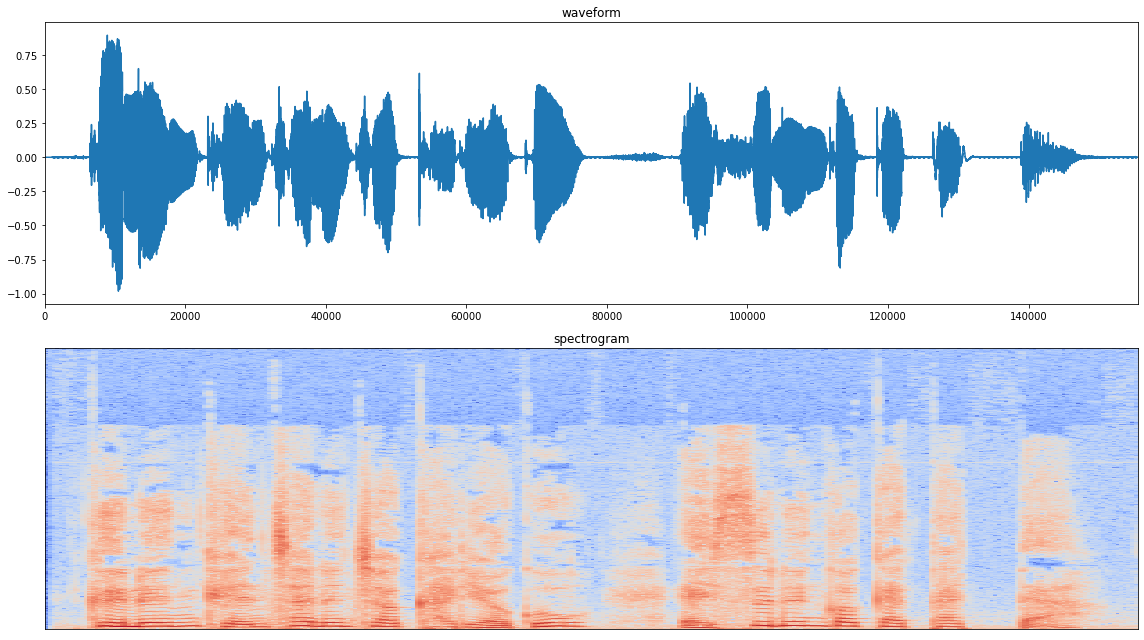

In [3]:
audio, sr = librosa.load('speech.wav', sr=None)
spectrogram = np.log(Spectrogram(audio)+1e-5)

plt.figure(figsize=(16,9))

plt.subplot(2,1,1)
plt.plot(audio)
plt.xlim([0,len(audio)])
plt.title('waveform')

plt.subplot(2,1,2)
librosa.display.specshow(spectrogram)
plt.title('spectrogram')

plt.tight_layout()
plt.savefig('example1_output.png')
# plt.close()

In [4]:
!pip install pyworld

     |████████████████████████████████| 215kB 5.3MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for pyworld: filename=pyworld-0.3.0-cp37-cp37m-linux_x86_64.whl size=608586 sha256=343d681bb39bd40eb77a2cfb8a092636df20fb0a40b883f116967dab01ca4a88
  Stored in directory: /root/.cache/pip/wheels/dc/27/35/dc77501124e514e06bd33bc41253b61dbaea19599c6da2679b
Successfully built pyworld


In [5]:
import pyworld as pw 

audio, sr = librosa.load('speech.wav', sr=None)
spectrogram = np.log(np.abs(librosa.core.stft(audio))+1e-5)

audio = np.asarray(audio, dtype='float64')

_f0, t = pw.dio(audio, sr)

f0 = pw.stonemask(audio, _f0, t, sr)

rms = librosa.feature.rms(audio)

plt.figure(figsize=(16,9))

plt.subplot(4,1,1)
plt.plot(audio)
plt.xlim([0,len(audio)])
plt.title('waveform')

plt.subplot(4,1,2)
librosa.display.specshow(spectrogram)
plt.title('spectrogram')

plt.subplot(4,1,3)
plt.plot(rms[0])
plt.xlim([0,len(rms[0])])
plt.title('rms')

plt.subplot(4,1,4)
plt.plot(f0)
plt.xlim([0,len(f0)])
plt.title('pitch')

plt.tight_layout()
plt.savefig('example2_output.png')
plt.close()

## 아래는 수정 필요!

In [15]:
import soundfile as sf

audio, sr = librosa.load('speech.wav', sr=None)
onsets = librosa.onset.onset_detect(audio, sr=44100)
onset_times = librosa.frames_to_time(onsets)
print(onset_times) # 확인용 

plt.figure(figsize=(16,9))
plt.subplot(2,1,1)
plt.plot(audio)
plt.xlim([0,len(audio)])

for item in onsets:
    plt.axvline(x=(int)(item*sr), c='r')
    print(item) # 확인용
    # 세로 선을 x 위치에 그려주는 함수. 

plt.title('waveform')
plt.subplot(2,1,2)
librosa.display.specshow(spectrogram)
for item in onsets:
    plt.axvline(x=(int)(item*sr/512), c='r')

plt.title('spectrogram')
plt.tight_layout()
plt.savefig('example3_output.png')
plt.close()

for i in range(len(onsets[:-1])):
    sf.write('example3_output_'+str(i).zfill(2)+'.wav', audio[(int)(onsets[i]*sr):(int)(onsets[i+1]*sr)], sr)

[0.09287982 0.30185941 0.62693878 1.06811791 1.50929705 1.83437642
 2.04335601 2.43809524 3.13469388 3.20435374 4.13315193 4.71365079
 4.80653061 5.08517007 5.38702948 5.75854875 6.31582766]
4
13
27
46
65
79
88
105
135
138
178
203
207
219
232
248
272


In [18]:
ipd.Audio('/content/example3_output_03.wav')